In [ ]:
!pip install mne
import mne
from google.colab import drive
#drive.mount('/content/drive')

     |████████████████████████████████| 7.5 MB 28.4 MB/s 


In [ ]:
raw = mne.io.read_raw_fif("/content/drive/MyDrive/School/Cognitive_J_comp/OpenMIIR-RawEEG_v1/P01-raw.fif")

Opening raw data file /content/drive/MyDrive/School/Cognitive_J_comp/OpenMIIR-RawEEG_v1/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.


In [ ]:
print(raw)
print(raw.info)


<Raw | P01-raw.fif, 69 x 2478166 (4840.2 s), ~79 kB, data not loaded>
<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 Stimulus
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>


['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'STI 014']


Effective window size : 4.000 (s)


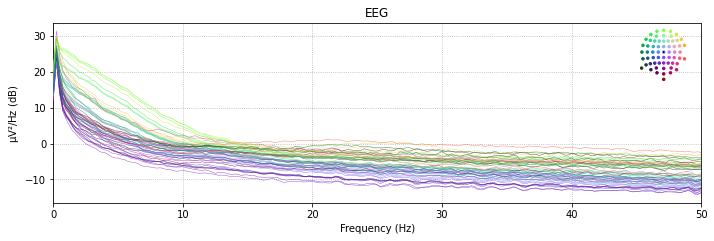

Using matplotlib as 2D backend.
Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


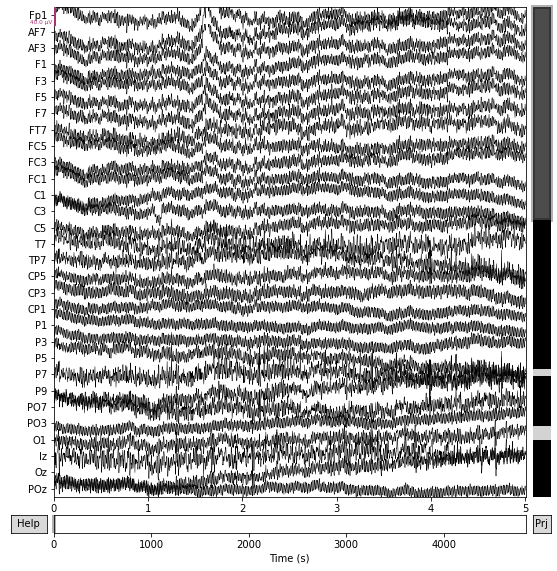

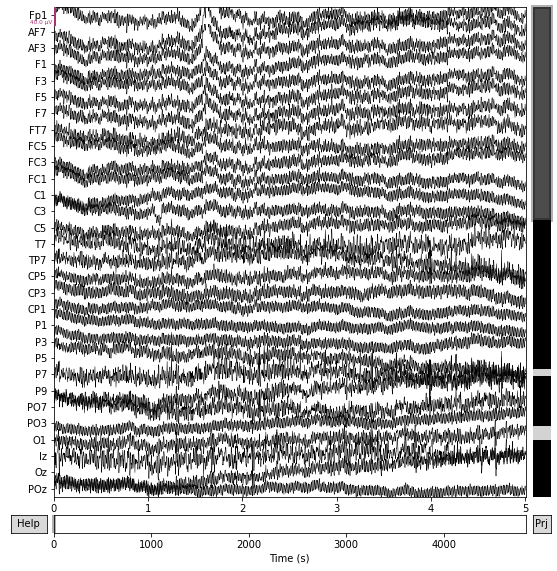

In [ ]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 61 channels (please be patient, this may take a while)


<ipython-input-6-30624da7c055>:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 110.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
2420 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
2420 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


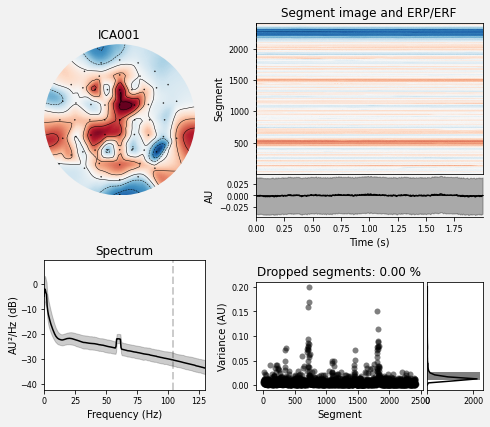

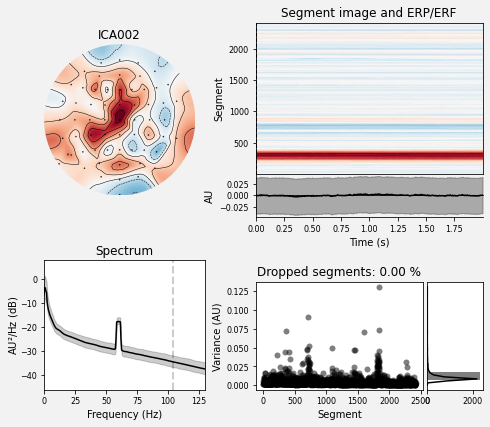

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:


ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
Using matplotlib as 2D backend.
Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


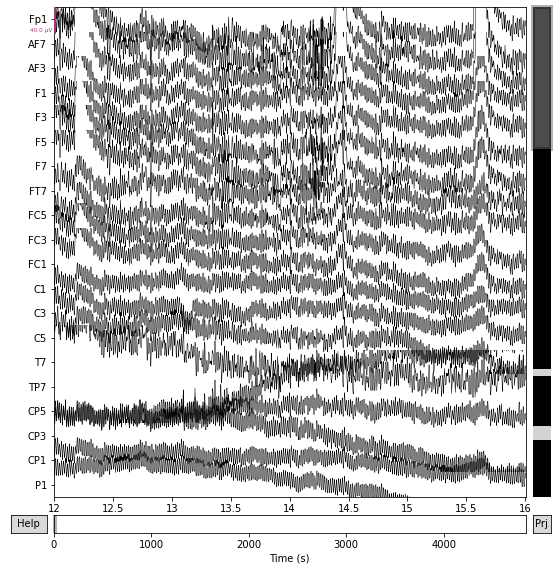

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


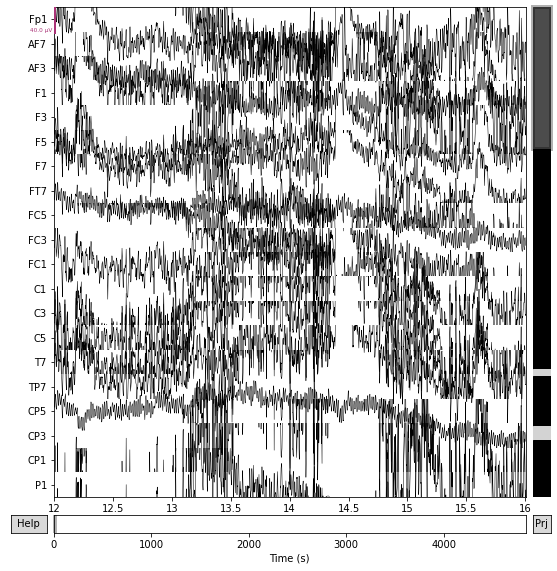

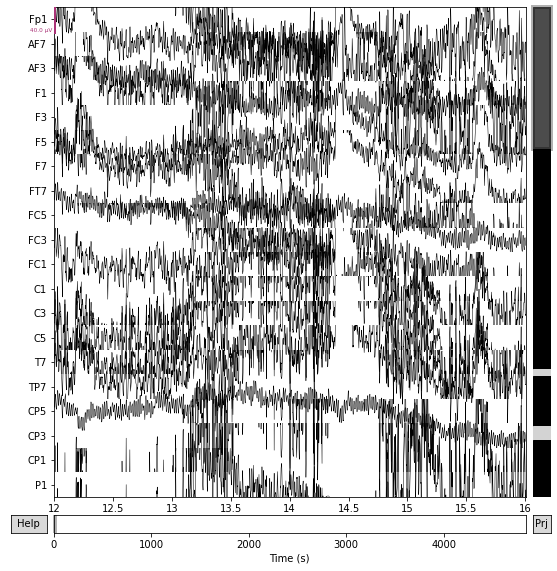

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = raw.info.ch_names
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

In [ ]:
events = mne.find_events(raw)
print(events[:5].sort)  # show the first 5

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
[[  512     0   121]
 [  520     0  1000]
 [ 8141     0   122]
 [ 8147     0  1000]
 [16517     0   123]]


In [ ]:
event_dict = {'auditory/left': 11, 'auditory/right': 12, 'visual/left': 31,
              'visual/right': 32, 'smiley': 222, 'buttonpress': 233}

<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 13 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 14 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 21 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 22 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 23 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 24 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 33 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-10-6e8e33236566>:2: RuntimeWarning: event 34 missing from event_id will be ignored
  first_samp=

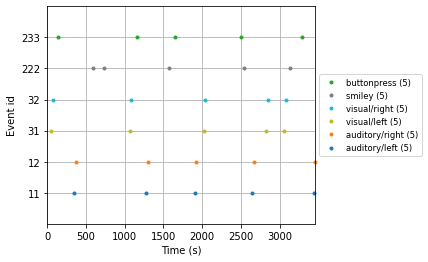

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [ ]:
reject_criteria = dict(#mag=4000e-15,     # 4000 fT
                       #grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV

In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

Not setting metadata
30 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
1 projection items activated
Using data from preloaded Raw for 30 events and 359 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'AF7', 'AF3', 'F3', 'FT7', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP3', 'CP1', 'P1', 'P3', 'P7', 'PO3', 'Iz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AFz', 'Fz', 'F4', 'FC2', 'FCz', 'Cz', 'C6', 'TP8', 'CP6', 'CP4', 'P2', 'P6', 'PO4']
    Rejecting  epoch based on EEG : ['F3', 'TP7', 'CP3', 'CP1', 'P3', 'P7', 'Iz', 'POz', 'CPz', 'AFz', 'Fz', 'FC2', 'FCz', 'Cz', 'P6']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'C1', 'C3', 'C5', 'TP7', 'CP3', 'CP1', 'P3', 'P7', 'PO3', 'Iz', 'POz', 'CPz', 'AFz', 'Fz', 'FC2', 'FCz', 'Cz', 'C6', 'CP4', 'P2', 'P6', 'PO4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF7', 'AF3', 'F3', 'C1', 'C3', 'C5', 'TP7', 'CP3', 'CP1', 'P1', 'P3', 'P7', 'PO3', 'Iz', 'POz', 'CPz', 'Fpz'

In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs  # free up memory

Dropped 0 epochs: 


In [ ]:
condition = 'Left Auditory'
evoked = read_evokeds(fname, condition=condition, baseline=(None, 0))

In [ ]:
times = np.arange(0.05, 0.151, 0.02)
evoked.plot_topomap(times, ch_type='mag', time_unit='s')

In [ ]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

In [ ]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

In [ ]:
# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
fake_evoked.plot_sensors(axes=ax[0], show=False)

# in the second panel we plot the positions using the EEGLAB reference sphere
fake_evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show=False)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')

In [ ]:
data_path = sample.data_path()
meg_path = data_path / 'MEG' / 'sample'
raw_fname = meg_path / 'sample_audvis_filt-0-40_raw.fif'

raw = io.read_raw_fif(raw_fname, preload=True)
raw.filter(1, 20, fir_design='firwin')

picks = mne.pick_types(raw.info, meg=True, exclude=[])
tmin, tmax = 0, 120  # use the first 120s of data
fmin, fmax = 2, 20  # look at frequencies between 2 and 20Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2
psds, freqs = psd_welch(raw, picks=picks, tmin=tmin, tmax=tmax,
                        fmin=fmin, fmax=fmax)
psds = 20 * np.log10(psds)  # scale to dB


def my_callback(ax, ch_idx):
    """
    This block of code is executed once you click on one of the channel axes
    in the plot. To work with the viz internals, this function should only take
    two parameters, the axis and the channel or data index.
    """
    ax.plot(freqs, psds[ch_idx], color='red')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power (dB)')


for ax, idx in iter_topography(raw.info,
                               fig_facecolor='white',
                               axis_facecolor='white',
                               axis_spinecolor='white',
                               on_pick=my_callback):
    ax.plot(psds[idx], color='red')

plt.gcf().suptitle('Power spectral densities')
plt.show()

In [ ]:
  aud_epochs.plot_image(picks=['Fp1', 'P1'])

In [ ]:
aud_epochs.plot_image(picks=['Fp1', 'O1'])

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['P1'])